# numpy.sort()
- We examine the functioning of `np.sort()`
- A few basic sorting algorithms are introduced.

`numpy.sort(a, axis=- 1, kind=None, order=None)`

Return a sorted copy of an array.

### Parameters
- `a` : array_like, Array to be sorted.
- `axis`: int or None, optional.
    - Axis along which to sort. If None, the array is flattened before sorting. The default is -1, which sorts along the last axis.
- `kind`: {‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}, optional
  
    - Sorting algorithm. The default is ‘quicksort’. Note that both ‘stable’ and ‘mergesort’ use timsort or radix sort under the covers and, in general, the actual implementation will vary with data type. The ‘mergesort’ option is retained for backwards compatibility.

- `order`: str or list of str, optional
    - When `a` is an array with fields defined, this argument specifies which fields to compare first, second, etc. A single field can be specified as a string, and not all fields need be specified, but unspecified fields will still be used, in the order in which they come up in the dtype, to break ties.

### Returns
- `sorted_array`: `ndarray`
    - Array of the same type and shape as a.

In [1]:
import cv2  
import imageio
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# sort example.
np.random.seed(2022)
a = np.random.randint(low=100, high=1000, size=10)
print(a)

[993 320 273 724 789 340 956 118 124 244]


In [3]:
np.sort(a) # ascending order!

array([118, 124, 244, 273, 320, 340, 724, 789, 956, 993])

In [4]:
indx = np.argsort(a)
print(indx, "index list, sorted")
print(a[indx], "array indexed by ")

[7 8 9 2 1 5 3 4 6 0] index list, sorted
[118 124 244 273 320 340 724 789 956 993] array indexed by 


In [5]:
# when an array is given, sorting is done through the last axis
a = np.random.randint(low=0, high=256,size=(4,3))
sa = np.sort(a)
print("a:", a)
print("sorted:", sa)

a: [[ 53  41  33]
 [ 27  11 147]
 [126  94 232]
 [203  48 147]]
sorted: [[ 33  41  53]
 [ 11  27 147]
 [ 94 126 232]
 [ 48 147 203]]


## Sorting in the Image

<class 'numpy.ndarray'> (426, 640, 3)


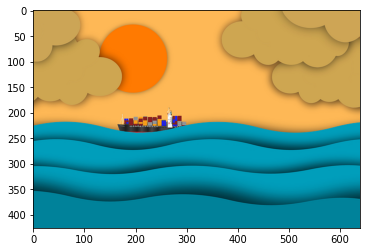

In [6]:
# retrieve an RGB image
im = cv2.imread("pixels/image-15.png")[:,:,::-1]
# im = cv2.imread("pixels/sogang.jpg")
print(type(im), im.shape)
plt.imshow(im);

In [55]:
def show(im, im2):
    ii = [im, im2]
    fig, axis = plt.subplots(1,2, figsize=(13,6))
    for ax, v in zip(axis, ii):
        if len(im.shape) == 2:
            ax.imshow(v, cmap='gray')
        else:
            ax.imshow(v)
        ax.set_axis_off()

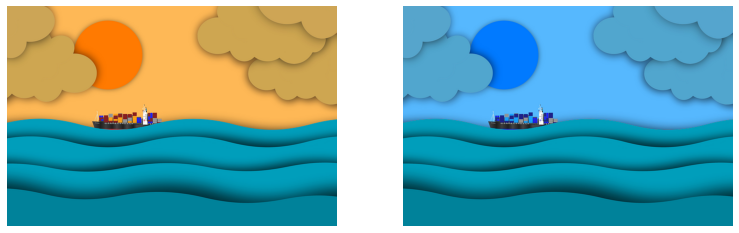

In [56]:
# simple sort()
imsort = np.sort(im)
show(im, imsort)

### Question:
Why do we see blue-ish image?

---

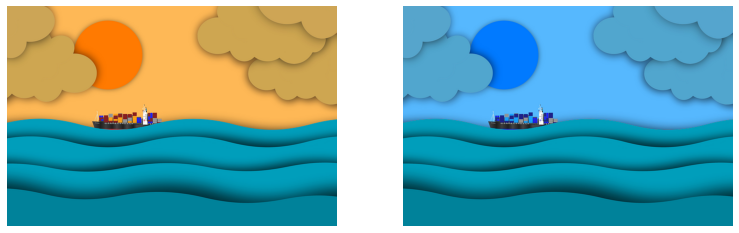

In [57]:
# we can specify the axis of sorting operation
imsort = np.sort(im, axis=2) # the last axis
show(im, imsort)

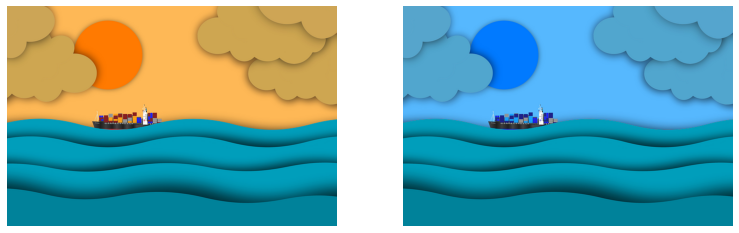

In [58]:
# we can specify the axis of sorting operation
imsort = np.sort(im, axis=-1) # the last axis
show(im, imsort)

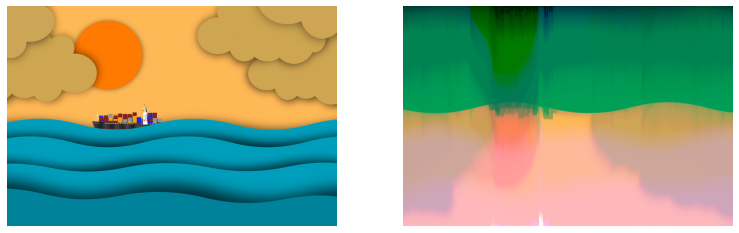

In [59]:
# sorting along the vertical axis
im = cv2.imread("pixels/image-15.png")[:,:,::-1]

imsort0 = np.sort(im, axis=0)
show(im, imsort0)

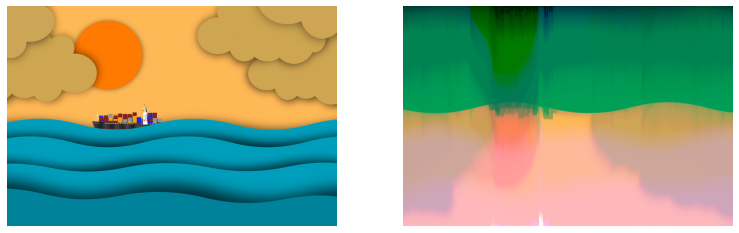

In [60]:
# for-loop version of np.sort(a, axis=0)
re = np.zeros_like(im)
for c in range(im.shape[1]):
    for k in range(3):
        v = im[:,c,k]
        vs = np.sort(v)
        re[:, c, k] = vs
show(im, re)

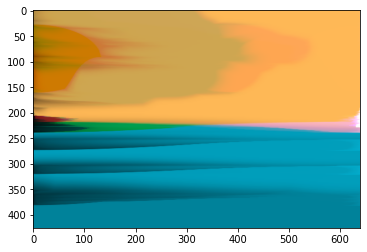

In [61]:
imsort1 = np.sort(im, axis=1)
plt.imshow(imsort1);

(817920,) 817920


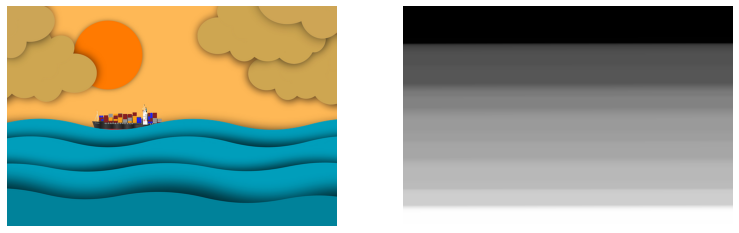

In [62]:
imsortnone = np.sort(im, axis=None)
print(imsortnone.shape, im.shape[0]*im.shape[1]*im.shape[2])
imsortnone = imsortnone.reshape(im.shape)
show(im, imsortnone)

## Gray Scale Images

(426, 640)


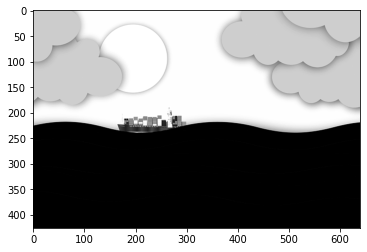

In [63]:
blue = im[:,:,0]  # red channel
print(blue.shape)
plt.imshow(blue, cmap='gray');

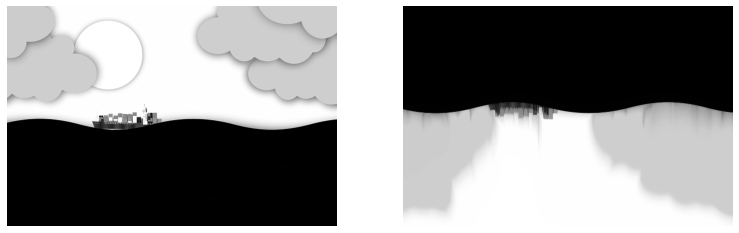

In [66]:
bs0 = np.sort(blue, axis=0)
show(blue, bs0)

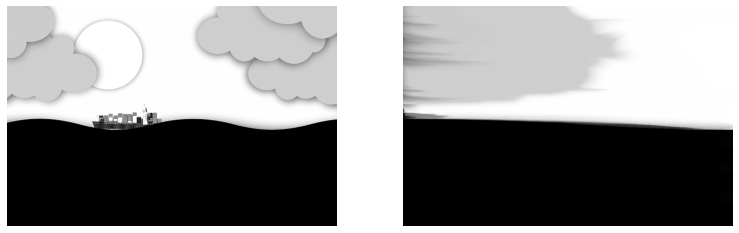

In [67]:
bs1 = np.sort(blue, axis=1)
show(blue, bs1)

(272640,)


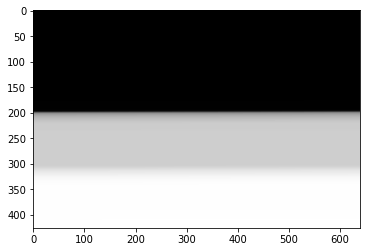

In [68]:
bs_none = np.sort(blue, axis=None)
print(bs_none.shape)
bs_none = bs_none.reshape(blue.shape[0], blue.shape[1])
plt.imshow(bs_none, cmap='gray');

(272640,)


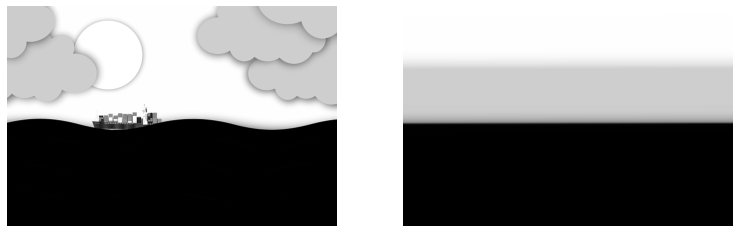

In [75]:
bs_none = np.sort(blue, axis=None)[::-1] # ascending -> descending
print(bs_none.shape)
bs_none = bs_none.reshape(blue.shape[0], blue.shape[1])
show(blue, bs_none)

## Try: Sort for each channel and combine them into a color array

len:  3 (426, 640)
(426, 640, 3)


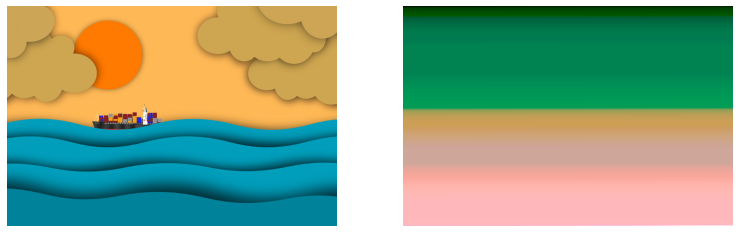

In [77]:
# ascending order
im_none_colors = [np.sort(im[:,:,k], axis=None).reshape(im.shape[:2]) 
                  for k in range(3)]

print("len: ", len(im_none_colors), im_none_colors[0].shape )

combined = np.stack(im_none_colors, axis=2)

print(combined.shape)
show(im, combined)

len:  3 (426, 640)
(426, 640, 3)


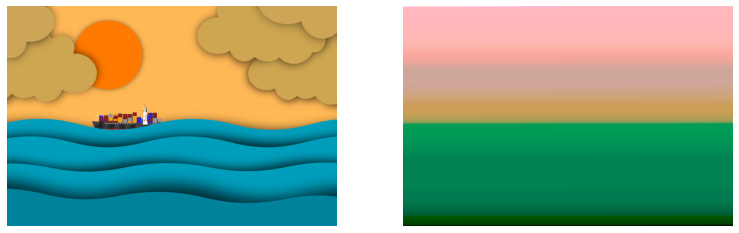

In [78]:
# descending order
im_none_colors = [np.sort(im[:,:,k], axis=None)[::-1].reshape(im.shape[:2]) 
                  for k in range(3)]

print("len: ", len(im_none_colors), im_none_colors[0].shape )

combined = np.stack(im_none_colors, axis=2)

print(combined.shape)
show(im, combined)

## Sorting along a color channel

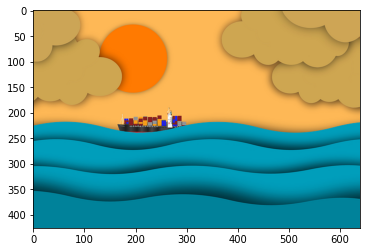

In [79]:
plt.imshow(im); # im is an RGB

(272640, 3)
(272640,)


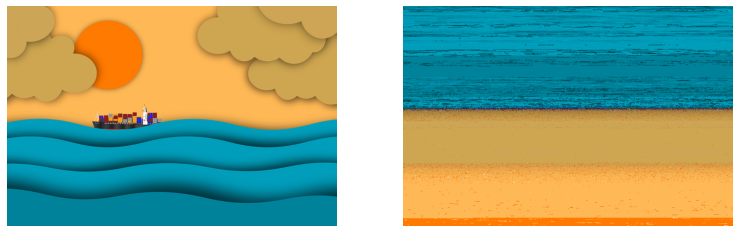

In [83]:
ii = im.reshape((-1,3)); print(ii.shape)
b = ii[:,0]; print(b.shape)  # red channel
a = b.argsort();
jj = ii[a].reshape(im.shape)
show(im, jj)

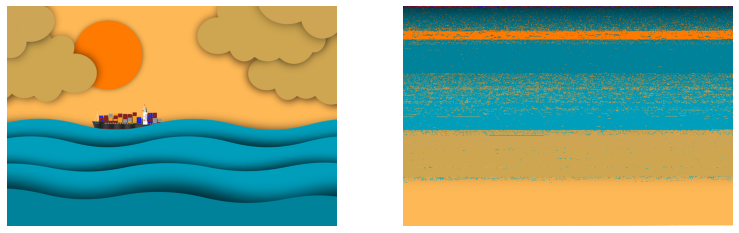

In [86]:
ii = im.reshape((-1,3))
ii.shape
b = ii[:,1]   # green channel
a = b.argsort(); a; b[a]; ii[a]
jj = ii[a].reshape(im.shape)
show(im, jj)

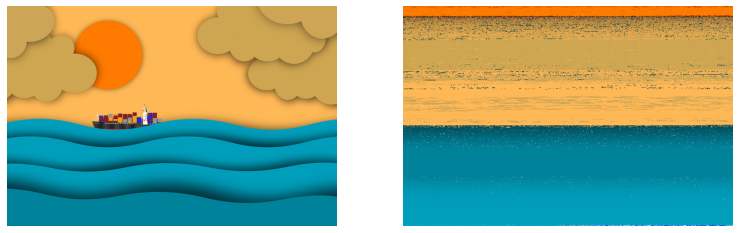

In [87]:
ii = im.reshape((-1,3))
ii.shape
b = ii[:,2]  # blue channel
a = b.argsort(); a; b[a]; ii[a]
jj = ii[a].reshape(im.shape)
show(im, jj)

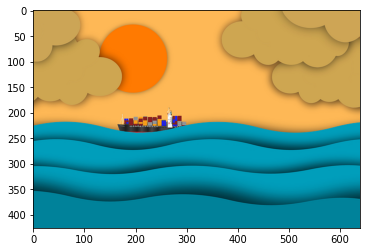

In [88]:
jj = np.zeros_like(im)
for col in range(im.shape[1]):
    c = im[:, col, :]
    jj[:, col, :] = c
#
plt.imshow(jj);

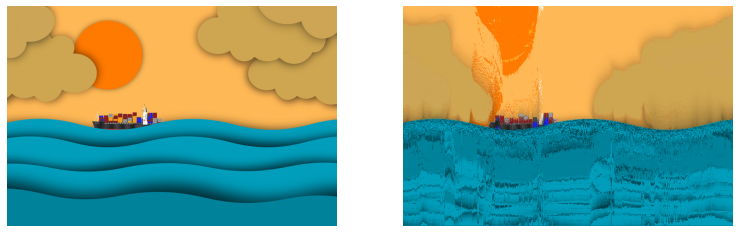

In [90]:
jj = np.zeros_like(im)
for col in range(im.shape[1]):
    c = im[:, col, :]
    d = c[np.argsort(c[:,0])][::-1]   # sort along the red of the column in descending order
    jj[:, col, :] = d
#
show(im, jj)

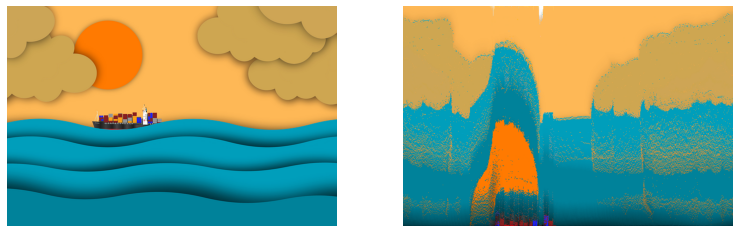

In [91]:
jj = np.zeros_like(im)
for col in range(im.shape[1]):
    c = im[:, col, :]
    d = c[np.argsort(c[:,1])][::-1]   # sort along the red of the column in descending order
    jj[:, col, :] = d
#
show(im, jj)

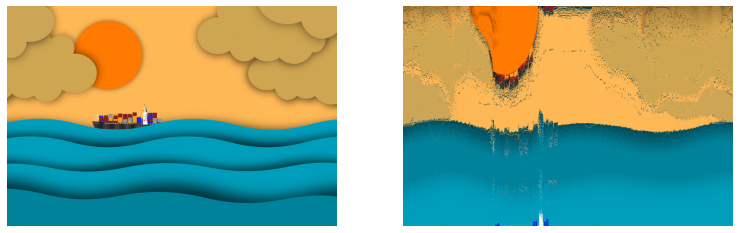

In [93]:
jj = np.zeros_like(im)
for col in range(im.shape[1]):
    c = im[:, col, :]
    d = c[np.argsort(c[:,2])]   # sort along the red of the column in ascending order
    jj[:, col, :] = d
#
show(im, jj)

---
## Sort by Hue or Value

1. convert BGR to HSV
2. sort along H (or V) : the other two components must move all together.
3. convert back to BGR
4. display

# Sorting Algorithms
1. selection sort: find max, exchange
2. quick sort: divide half and move

- https://www.sortvisualizer.com/